<a href="https://colab.research.google.com/github/4nkit-3isGGS/DS_ChaiCode/blob/main/COVID_19_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: Data Loading

In [31]:
# Importing all the necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

confirmed_data = pd.read_csv('/content/covid_19_confirmed_v1_lyst1747728690432.csv')
death_data = pd.read_csv('/content/covid_19_deaths_v1_lyst1747728711771.csv', header=1)
recovered_data = pd.read_csv('/content/covid_19_recovered_v1_lyst1747728719904.csv', header=1)


Ouestion 2: Data Exploration

In [ ]:
# Q 2.1
confirmed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB


In [ ]:
death_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Columns: 498 entries, Column1 to Column498
dtypes: object(498)
memory usage: 1.1+ MB


In [ ]:
recovered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Columns: 498 entries, Column1 to Column498
dtypes: object(498)
memory usage: 1019.5+ KB


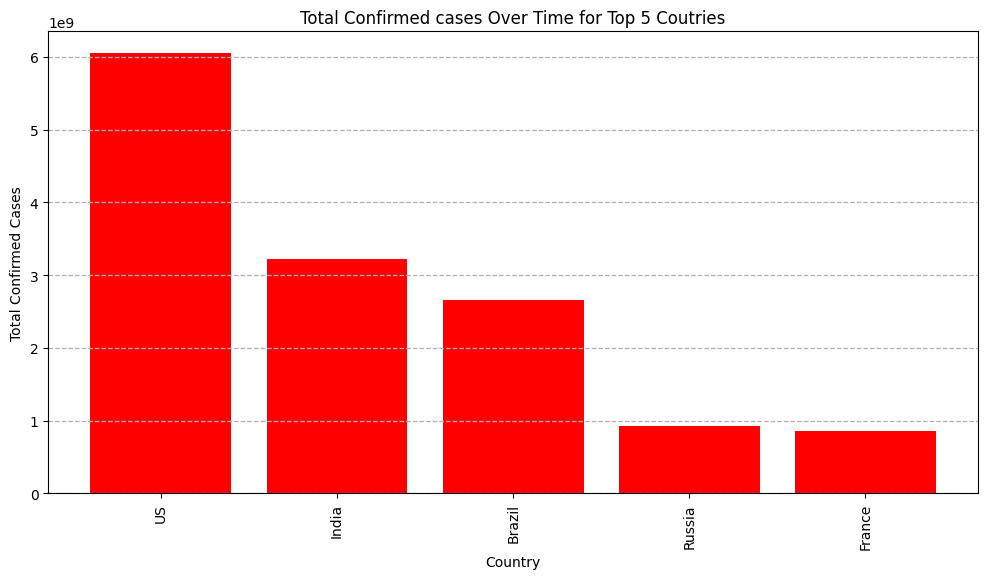

In [ ]:
# Q 2.2
# Removed the unwanted columns for simplicity
only_country = confirmed_data.drop(columns=['Province/State', 'Lat', 'Long'])

# Grouped By country to find the sum of confirmed for all Provinces/State
only_country_confirmed = only_country.groupby('Country/Region').sum()

# Added a new column to store all the confirmed cases per country
only_country_confirmed['Total_Confirmed'] = only_country_confirmed.sum(axis = 1)

# Sorted in Decending Order to find the top 5 countries with most confirmed cases
only_country_confirmed_sort = only_country_confirmed.sort_values(by = 'Total_Confirmed', ascending = False)
only_country_confirmed_top5 = only_country_confirmed_sort.head()

# Plotting the Graph

plt.figure(figsize=(12,6))
plt.bar(only_country_confirmed_top5.index, only_country_confirmed_top5['Total_Confirmed'], color = 'red')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.title('Total Confirmed cases Over Time for Top 5 Coutries')
plt.xticks(rotation = 90)

plt.grid(axis='y', linestyle='--', linewidth=0.9)
plt.savefig('Total_Confirmed_cases_Over_Time_for_Top5_Coutries.png')
plt.show()

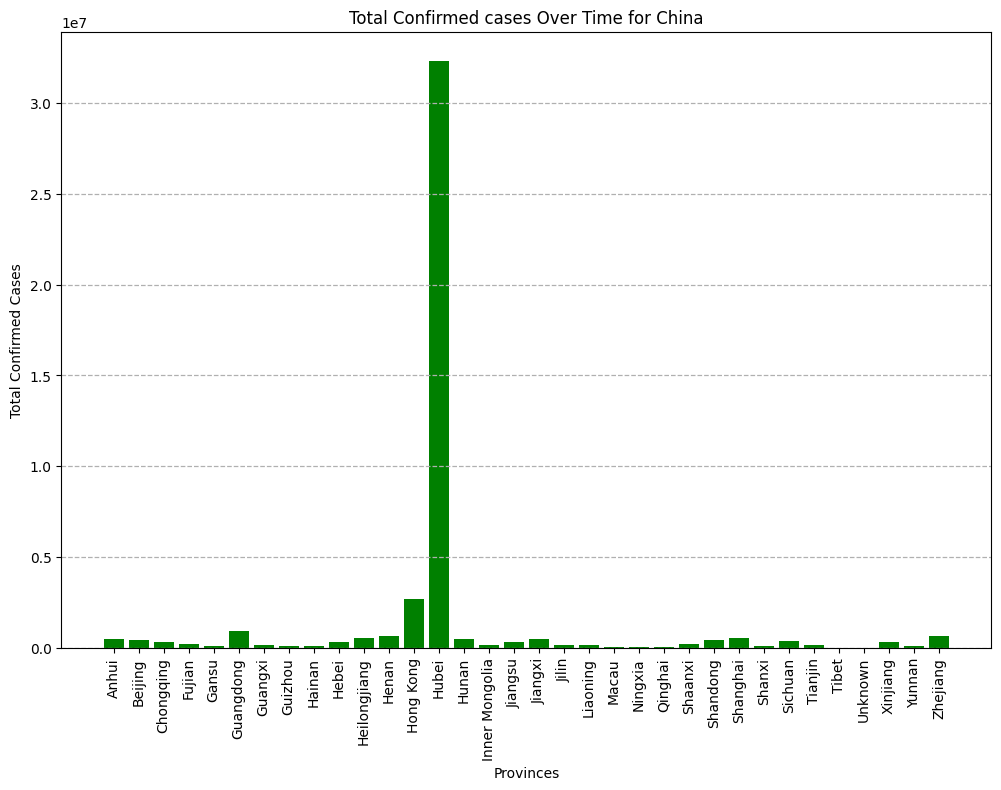

In [ ]:
# Q 2.3
# removing the uncessary columns for simplicity
only_China = confirmed_data.drop(columns=['Lat', 'Long'])

# fetching the data for China Only
only_China = only_China[only_China['Country/Region'] == 'China']

# Grouping by Province to find the total confirmed cases per Province
only_China_province = only_China.groupby('Province/State').sum()

# We can remove the country column as well, cuz this data is only for china and easily find the total confimed cases per province
only_China_province = only_China_province.drop(columns = ['Country/Region'])

# Added a new column Total confirmed cases per province
only_China_province['Total_confirmed'] = only_China_province.sum(axis = 1)

# Plotting the Graph

plt.figure(figsize=(12,8))
plt.bar(only_China_province.index, only_China_province['Total_confirmed'], color = 'green')
plt.xlabel('Provinces')
plt.ylabel('Total Confirmed Cases')
plt.title('Total Confirmed cases Over Time for China')
plt.xticks(rotation = 90)

plt.grid(axis='y', linestyle='--', linewidth=0.9)
plt.savefig('China_Total_Confirmed_cases_Over_Time.png')
plt.show()

Question 3: Handling Missing Data

In [ ]:
# Q 3.1

confirmed_data = pd.read_csv('/content/covid_19_confirmed_v1_lyst1747728690432.csv')

# checked which columns have missing values
confirmed_data.isnull().sum()

# used imputation method Constant imputation to fill
confirmed_data['Province/State'].fillna('Unknown', inplace = True)
confirmed_data.fillna({'Lat': 0}, inplace = True)
confirmed_data.fillna({'Long': 0}, inplace = True)
confirmed_data.isnull().sum()




<ipython-input-93-c470d4b5f4fa>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  confirmed_data['Province/State'].fillna('Unknown', inplace = True)


,0
Province/State,0
Country/Region,0
Lat,0
Long,0
1/22/20,0
...,...
5/25/21,0
5/26/21,0
5/27/21,0
5/28/21,0


Question 4: Data Cleaning and Preparation

In [3]:
# Q 4.1

confirmed_data = pd.read_csv('/content/covid_19_confirmed_v1_lyst1747728690432.csv')

confirmed_data['Province/State'].replace(np.nan, 'All Provinces', inplace=True)
confirmed_data.head()


<ipython-input-3-677ec8477d50>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  confirmed_data['Province/State'].replace(np.nan, 'All Provinces', inplace=True)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,All Provinces,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,All Provinces,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,All Provinces,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,All Provinces,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,All Provinces,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


Question 5: Independent Data Analysis

In [17]:
# Q 5.1
# Removing unnecessary columns for simplixity, and preparing the data
required_data = confirmed_data.drop(columns=['Lat', 'Long','Province/State'])
required_data = required_data.groupby('Country/Region').sum()

# fetching data for the required countries
req_countries = ['Germany', 'France','Italy']
req_data = required_data.loc[req_countries].T #transposed so that dates can become the indexes
req_data.index = pd.to_datetime(req_data.index, format='%m/%d/%y')

# using .diff() to calculate the difference in new cases between two consecutice days
daily_surge = req_data.diff()
peak = daily_surge.max()

# finding the date that has the peak number of new cases
peak_dates = daily_surge.idxmax()

# printing the required result
for country in req_countries:
  print(f"{country}: {int(peak[country])} cases on {peak_dates[country].date()}")

Germany: 49044 cases on 2020-12-30
France: 117900 cases on 2021-04-11
Italy: 40902 cases on 2020-11-13


In [38]:
# Q 5.2
# Removing unnecessary columns for simplixity, and preparing the data
required_confirmed_data = confirmed_data.drop(columns=['Lat', 'Long','Province/State'])
required_confirmed_data = required_data.groupby('Country/Region').sum()


# preparing required data
required_recovered_data = recovered_data.drop(columns=['Lat', 'Long','Province/State'])
required_recovered_data = required_recovered_data.groupby('Country/Region').sum()

req_countries1 = ['Canada','Australia']

confirmed = required_confirmed_data.loc[req_countries1].T
confirmed.index = pd.to_datetime(confirmed.index, format='%m/%d/%y')

recovered = required_recovered_data.loc[req_countries1].T
recovered.index = pd.to_datetime(recovered.index, format='%m/%d/%y')

# Calculating  recovery rate
recovery_rate = (recovered / confirmed) * 100

# rate on december 31, 2020
rate_on_dec31 = recovery_rate.loc['2020-12-31'].round(2)

# Print recovery rates
print("Recovery Rate on 2020-12-31:")
for country, rate in rate_on_dec31.items():
    print(f"{country}: {rate}%")

# Finding the country with higher recovery rate bet Can & Aus
best_country = rate_on_dec31.idxmax()
best_rate = rate_on_dec31.max()

print(f"{best_country} had the better recovery rate of {best_rate}% on 2020-12-31.")





Recovery Rate on 2020-12-31:
Canada: 84.47%
Australia: 79.38%
Canada had the better recovery rate of 84.47% on 2020-12-31.


In [64]:
# Q 5.3
# preparing required data
required_confirmed_data = confirmed_data.drop(columns=['Lat', 'Long'])
confirmed_canada_only = required_confirmed_data[confirmed_data['Country/Region'] == 'Canada']
confirmed_canada_only = confirmed_canada_only.groupby('Province/State').sum().drop(columns=['Country/Region'])

required_death_data = death_data.drop(columns=['Lat', 'Long'])
death_canada_only = required_death_data[death_data['Country/Region'] == 'Canada']
death_canada_only = death_canada_only.groupby('Province/State').sum().drop(columns=['Country/Region'])


latest_confirmed = confirmed_canada_only.iloc[:, -1]
latest_deaths = death_canada_only.iloc[:, -1]

death_rate = (latest_deaths / latest_confirmed * 100).round(2)


highest = death_rate.idxmax()
lowest = death_rate.idxmin()

# Print results
print("Death rate (%) by province/state in Canada:")
print(death_rate.sort_values(ascending=False))

print(f"Highest: {highest} ({death_rate[highest]}%)")
print(f"Lowest: {lowest} ({death_rate[lowest]}%)")



Death rate (%) by province/state in Canada:
Province/State
Diamond Princess              inf
Quebec                       3.01
Yukon                        2.38
Manitoba                     2.07
New Brunswick                1.96
Ontario                      1.62
Nova Scotia                  1.52
British Columbia             1.18
Saskatchewan                 1.16
Alberta                      0.98
Nunavut                      0.62
Newfoundland and Labrador    0.46
Northwest Territories        0.00
Grand Princess               0.00
Prince Edward Island         0.00
Repatriated Travellers       0.00
Name: 5/29/21, dtype: float64
Highest: Diamond Princess (inf%)
Lowest: Grand Princess (0.0%)


Question 6: Data Transformation

Question 7: Data Merging

Question 8: Combined Data Analysis